# Dataset prepratation

In [9]:
from PIL import Image

def rgb_mean(name, label):
    image = Image.open(name)
    rChannel = 0
    bChannel = 0
    gChannel = 0
    count = 0
    for x in range(image.width):
        for y in range(image.height): 
            count += 1
            rChannel += image.getpixel((x,y))[0]
            bChannel += image.getpixel((x,y))[2]
    rChannel = rChannel / count
    bChannel = bChannel / count
    
    return { "red": rChannel, "blue": bChannel, "label": label }

In [10]:
PATH = './Q9_Dataset/Images/'

dataset = [rgb_mean(PATH + f"c{i}.jpg", 0) for i in range(1, 66)]
dataset.extend(rgb_mean(PATH + f"m{i}.jpg", 1) for i in range(1, 58))

In [13]:
import pandas as pd

dataset = pd.DataFrame(dataset)

In [14]:
dataset.head()

,red,blue,label
0,99.342832,146.863646,0
1,42.561331,42.550760,0
2,57.817387,69.529757,0
3,96.806418,121.304978,0
4,58.278826,71.479754,0


In [19]:
X, y = dataset.drop(columns=["label"]), dataset["label"]
X_chelsea = dataset[dataset['label'] == 0].drop(columns=["label"])
X_manchester = dataset[dataset['label'] == 1].drop(columns=["label"])

In [20]:
X_chelsea.head()

,red,blue
0,99.342832,146.863646
1,42.561331,42.550760
2,57.817387,69.529757
3,96.806418,121.304978
4,58.278826,71.479754


In [21]:
X_manchester.head()

,red,blue
65,106.561280,71.205458
66,124.080669,62.128454
67,152.855040,101.028829
68,108.518552,73.549325
69,164.054403,101.097524


# Training Guassian Mixture Models

In [22]:
from sklearn.mixture import GaussianMixture

GMM_chelsea = GaussianMixture(n_components=2)
GMM_chelsea.fit(X_chelsea)

GaussianMixture(n_components=2)

In [23]:
from sklearn.mixture import GaussianMixture

GMM_manchester = GaussianMixture(n_components=2)
GMM_manchester.fit(X_manchester)

GaussianMixture(n_components=2)

In [31]:
import numpy as np
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()

    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


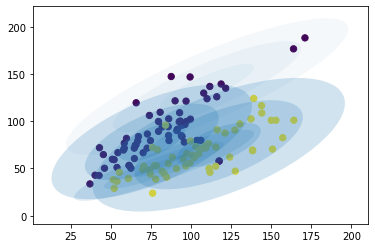

In [32]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=40, cmap='viridis')

w_factor_chelsea = 0.2 / GMM_chelsea.weights_.max()
w_factor_manchester = 0.2 / GMM_manchester.weights_.max()
for pos, covar, w in zip(GMM_chelsea.means_, GMM_chelsea.covariances_, GMM_chelsea.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor_chelsea)
for pos, covar, w in zip(GMM_manchester.means_, GMM_manchester.covariances_, GMM_manchester.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor_manchester)

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


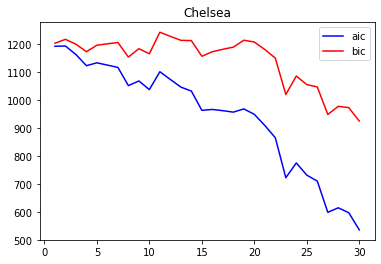

In [40]:
n_components = np.arange(1, 31)
BIC = np.zeros(n_components.shape)
AIC = np.zeros(n_components.shape)

for i, n in enumerate(n_components):
    GMM = GaussianMixture(n_components=n)
    GMM.fit(X_chelsea)
    AIC[i] = GMM.aic(X_chelsea)
    BIC[i] = GMM.bic(X_chelsea)

plt.plot(n_components, AIC, 'b', label='aic')
plt.plot(n_components, BIC, 'r', label='bic')
plt.title("Chelsea")
plt.legend()
plt.show()

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


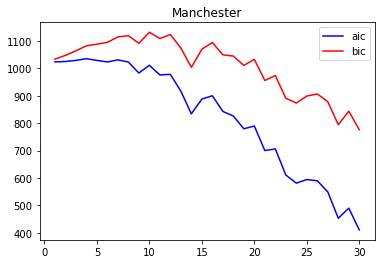

In [41]:
n_components = np.arange(1, 31)
BIC = np.zeros(n_components.shape)
AIC = np.zeros(n_components.shape)

for i, n in enumerate(n_components):
    GMM = GaussianMixture(n_components=n)
    GMM.fit(X_manchester)
    AIC[i] = GMM.aic(X_manchester)
    BIC[i] = GMM.bic(X_manchester)

plt.plot(n_components, AIC, 'b', label='aic')
plt.plot(n_components, BIC, 'r', label='bic')
plt.title("Manchester")
plt.legend()
plt.show()

In [39]:
values = (np.array(AIC) + np.array(BIC)) / 2
index_min = np.argmin(values)
print(index_min)

27
